### Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


### Load Dataset

In [4]:
digits = load_digits()

X = digits.data      
y = digits.target    

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (1797, 64)
Target shape: (1797,)


### Visualize Sample Digits

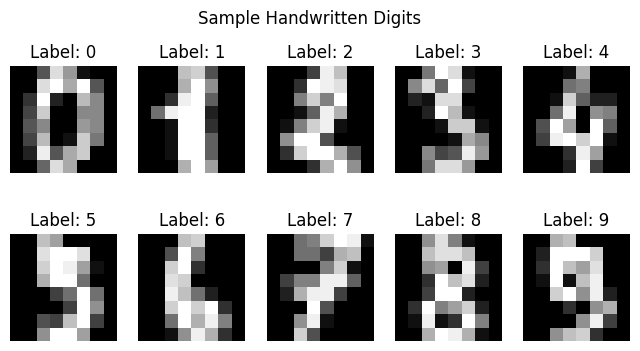

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(8,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')

plt.suptitle("Sample Handwritten Digits")
plt.show()
plt.savefig("digits.png")


### Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Feature Scaling (Important for KNN)

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train KNN with K = 3

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with K=3:", accuracy)


Accuracy with K=3: 0.9666666666666667


### Try Multiple K Values

In [12]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred_k = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)
    print(f"K={k} → Accuracy={acc:.4f}")


K=3 → Accuracy=0.9667
K=5 → Accuracy=0.9639
K=7 → Accuracy=0.9667
K=9 → Accuracy=0.9639


### Plot Accuracy vs K

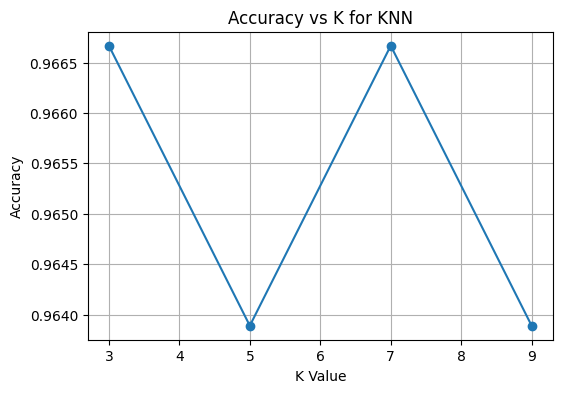

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K for KNN")
plt.grid(True)
plt.show()
plt.savefig("knn_accuracy.png")


### Confusion Matrix (Best K)

Best K: 3


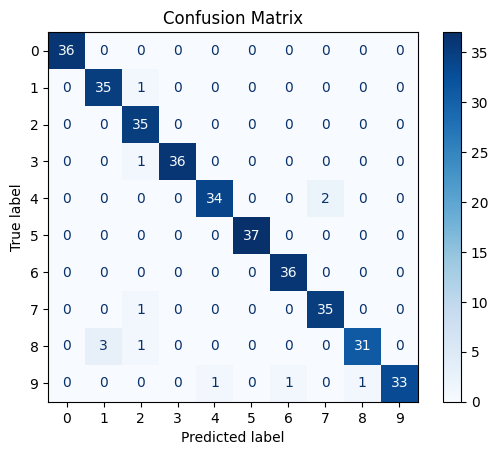

<Figure size 640x480 with 0 Axes>

In [15]:
best_k = k_values[np.argmax(accuracies)]
print("Best K:", best_k)

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

y_best_pred = best_knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_best_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
plt.savefig("confusion_matrix.png")


### Display 5 Test Images with Predictions

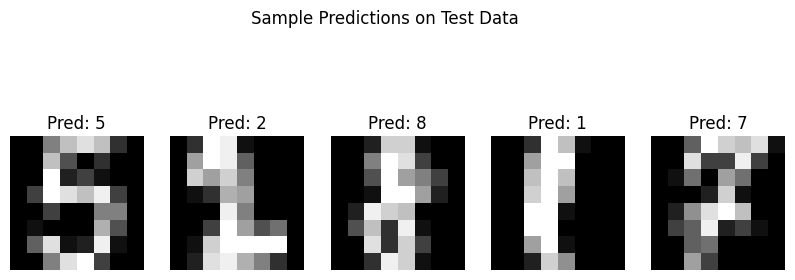

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_best_pred[i]}")
    plt.axis('off')

plt.suptitle("Sample Predictions on Test Data")
plt.show()
plt.savefig("best_sample_knn.png")
